<a href="https://colab.research.google.com/github/SamudiniD/IIT-FinalYear-Project/blob/main/Auto-Encoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!ls '/content/sample_data/test-image.fits'

/content/sample_data/test-image.fits


In [ ]:
!pip install astropy matplotlib tensorflow numpy


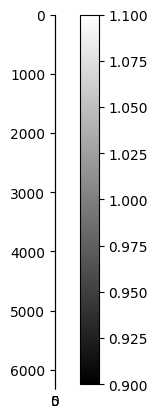

Image data shape: (6247, 8)
Image data type: float32


In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Load the JPG image
file_path = '/content/sample_data/1.jpg'  # Replace with the path to your JPG file
image = Image.open(file_path).convert('L')  # Convert image to grayscale

# Convert the image to a numpy array and normalize the values
image_data = np.asarray(image).astype(np.float32) / 255.0  # Normalize to [0, 1]

# Display the grayscale image
plt.imshow(image_data, cmap='gray')
plt.colorbar()
plt.show()

# Check the shape and type of the image data
print("Image data shape:", image_data.shape)
print("Image data type:", image_data.dtype)


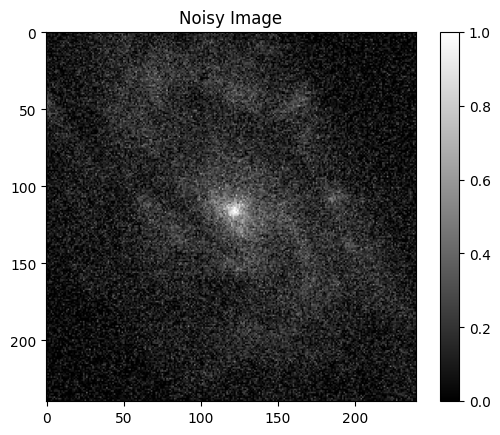

In [ ]:
# Add noise to the image
noise_factor = 0.1
noisy_image = image_data + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=image_data.shape)

# Clip the values to be in the range [0, 1]
noisy_image = np.clip(noisy_image, 0., 1.)

# Display the noisy image
plt.imshow(noisy_image, cmap='gray')
plt.colorbar()
plt.title('Noisy Image')
plt.show()


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the autoencoder model
def build_autoencoder(input_shape):
    # Encoder
    input_img = layers.Input(shape=input_shape)
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
    x = layers.MaxPooling2D((2, 2), padding='same')(x)
    x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
    encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

    # Decoder
    x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(encoded)
    x = layers.UpSampling2D((2, 2))(x)
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = layers.UpSampling2D((2, 2))(x)
    decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

    # Autoencoder
    autoencoder = models.Model(input_img, decoded)
    return autoencoder

# Define input shape and build the model
input_shape = (image_data.shape[0], image_data.shape[1], 1)  # Image shape with a single channel
autoencoder = build_autoencoder(input_shape)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.summary()


Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 240, 240, 1)]     0         
                                                                 
 conv2d_15 (Conv2D)          (None, 240, 240, 32)      320       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 120, 120, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 120, 120, 16)      4624      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 60, 60, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 60, 60, 16)        2320

In [ ]:
# Reshape the images to add the channel dimension
image_data = np.reshape(image_data, (1, image_data.shape[0], image_data.shape[1], 1))
noisy_image = np.reshape(noisy_image, (1, noisy_image.shape[0], noisy_image.shape[1], 1))

# Train the autoencoder
autoencoder.fit(noisy_image, image_data, epochs=100, verbose=1)


Epoch 1/100
1/1 [==============================] - 1s 997ms/step - loss: 0.6935
Epoch 2/100
1/1 [==============================] - 0s 74ms/step - loss: 0.6820
Epoch 3/100
1/1 [==============================] - 0s 74ms/step - loss: 0.6700
Epoch 4/100
1/1 [==============================] - 0s 77ms/step - loss: 0.6559
Epoch 5/100
1/1 [==============================] - 0s 83ms/step - loss: 0.6390
Epoch 6/100
1/1 [==============================] - 0s 74ms/step - loss: 0.6184
Epoch 7/100
1/1 [==============================] - 0s 78ms/step - loss: 0.5939
Epoch 8/100
1/1 [==============================] - 0s 77ms/step - loss: 0.5655
Epoch 9/100
1/1 [==============================] - 0s 74ms/step - loss: 0.5338
Epoch 10/100
1/1 [==============================] - 0s 76ms/step - loss: 0.5007
Epoch 11/100
1/1 [==============================] - 0s 79ms/step - loss: 0.4689
Epoch 12/100
1/1 [==============================] - 0s 76ms/step - loss: 0.4430
Epoch 13/100
1/1 [==============================

1/1 [==============================] - 0s 99ms/step


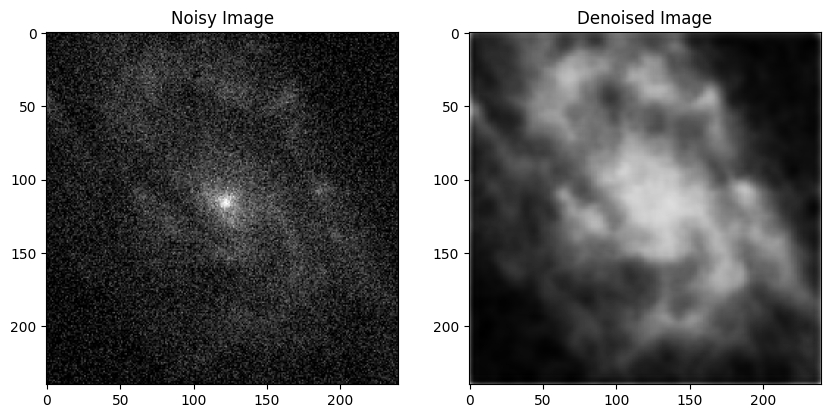

In [ ]:
# Use the autoencoder to denoise the image
denoised_image = autoencoder.predict(noisy_image)

# Reshape the output for visualization
denoised_image = np.reshape(denoised_image, (denoised_image.shape[1], denoised_image.shape[2]))

# Plot the noisy and denoised images
plt.figure(figsize=(10, 5))

# Noisy image
plt.subplot(1, 2, 1)
plt.title('Noisy Image')
plt.imshow(noisy_image.squeeze(), cmap='gray')

# Denoised image
plt.subplot(1, 2, 2)
plt.title('Denoised Image')
plt.imshow(denoised_image, cmap='gray')

plt.show()


# **consider that we are only having noisy image,**

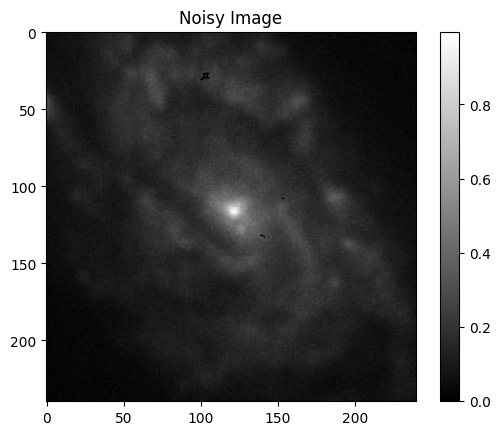

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Load the noisy image
file_path = '/content/sample_data/test-img1.jpg'  # Replace with your actual image file path
noisy_image = Image.open(file_path).convert('L')  # Convert to grayscale

# Convert to numpy array and normalize
noisy_image_data = np.asarray(noisy_image).astype(np.float32) / 255.0

# Display the noisy image
plt.imshow(noisy_image_data, cmap='gray')
plt.colorbar()
plt.title('Noisy Image')
plt.show()

# Reshape to add channel dimension (H, W, 1) for CNN processing
noisy_image_data = np.expand_dims(noisy_image_data, axis=-1)


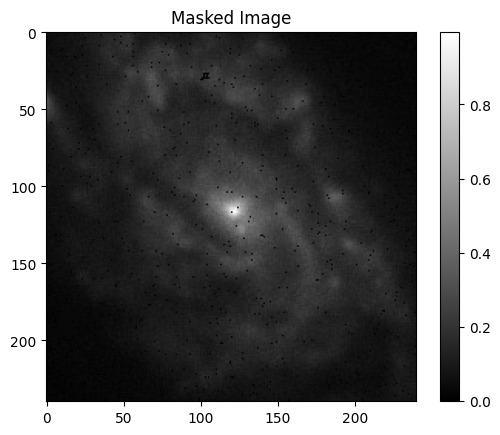

In [ ]:
def create_mask(image_shape, mask_fraction=0.1):
    """
    Create a binary mask that hides a fraction of the pixels in the image.
    """
    mask = np.random.rand(*image_shape) > mask_fraction  # Mask out fraction of the image
    return mask.astype(np.float32)

# Create a mask for the noisy image (mask_fraction controls how many pixels are hidden)
mask = create_mask(noisy_image_data.shape[:2], mask_fraction=0.01)

# Apply the mask to hide some pixels during training
masked_image = noisy_image_data * mask[..., np.newaxis]

# Display the masked image
plt.imshow(masked_image.squeeze(), cmap='gray')
plt.colorbar()
plt.title('Masked Image')
plt.show()


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the autoencoder model with blind-spot learning
def build_blindspot_autoencoder(input_shape):
    input_img = layers.Input(shape=input_shape)

    # Encoder (Downsampling)
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
    x = layers.MaxPooling2D((2, 2), padding='same')(x)
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

    # Decoder (Upsampling)
    x = layers.Conv2DTranspose(64, (3, 3), activation='relu', padding='same')(encoded)
    x = layers.UpSampling2D((2, 2))(x)
    x = layers.Conv2DTranspose(32, (3, 3), activation='relu', padding='same')(x)
    x = layers.UpSampling2D((2, 2))(x)

    # Output layer (prediction)
    output_img = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

    model = models.Model(inputs=input_img, outputs=output_img)
    return model

# Input shape should be (H, W, 1) where H, W are the dimensions of the noisy image
input_shape = (noisy_image_data.shape[0], noisy_image_data.shape[1], 1)
autoencoder = build_blindspot_autoencoder(input_shape)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')
autoencoder.summary()


Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 240, 240, 1)]     0         
                                                                 
 conv2d_26 (Conv2D)          (None, 240, 240, 32)      320       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 120, 120, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_27 (Conv2D)          (None, 120, 120, 64)      18496     
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 60, 60, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_transpose_4 (Conv2D  (None, 60, 60, 64)        3692

In [ ]:
# Reshape the data for training (adding batch dimension)
masked_image = np.expand_dims(masked_image, axis=0)
noisy_image_data = np.expand_dims(noisy_image_data, axis=0)

# Train the blind-spot autoencoder
history = autoencoder.fit(masked_image, noisy_image_data, epochs=100, verbose=1)


Epoch 1/100
1/1 [==============================] - 1s 946ms/step - loss: 0.1399
Epoch 2/100
1/1 [==============================] - 0s 81ms/step - loss: 0.1322
Epoch 3/100
1/1 [==============================] - 0s 83ms/step - loss: 0.1217
Epoch 4/100
1/1 [==============================] - 0s 85ms/step - loss: 0.1075
Epoch 5/100
1/1 [==============================] - 0s 82ms/step - loss: 0.0891
Epoch 6/100
1/1 [==============================] - 0s 85ms/step - loss: 0.0679
Epoch 7/100
1/1 [==============================] - 0s 87ms/step - loss: 0.0476
Epoch 8/100
1/1 [==============================] - 0s 82ms/step - loss: 0.0329
Epoch 9/100
1/1 [==============================] - 0s 86ms/step - loss: 0.0257
Epoch 10/100
1/1 [==============================] - 0s 81ms/step - loss: 0.0233
Epoch 11/100
1/1 [==============================] - 0s 82ms/step - loss: 0.0228
Epoch 12/100
1/1 [==============================] - 0s 85ms/step - loss: 0.0229
Epoch 13/100
1/1 [==============================

1/1 [==============================] - 0s 121ms/step


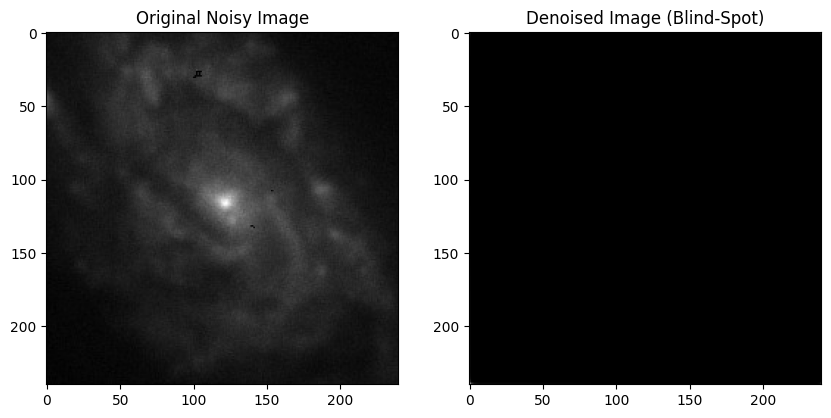

In [ ]:
# Use the autoencoder to denoise the image
denoised_image = autoencoder.predict(masked_image)

# Reshape the output for visualization
denoised_image = np.reshape(denoised_image, (denoised_image.shape[1], denoised_image.shape[2]))

# Plot the original noisy image and the denoised image
plt.figure(figsize=(10, 5))

# Original noisy image
plt.subplot(1, 2, 1)
plt.title('Original Noisy Image')
plt.imshow(noisy_image_data.squeeze(), cmap='gray')

# Denoised image
plt.subplot(1, 2, 2)
plt.title('Denoised Image (Blind-Spot)')
plt.imshow(denoised_image, cmap='gray')

plt.show()


In [ ]:
#-----------------

Filename: /content/sample_data/wrapi3.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     132   (256, 256)   float32   


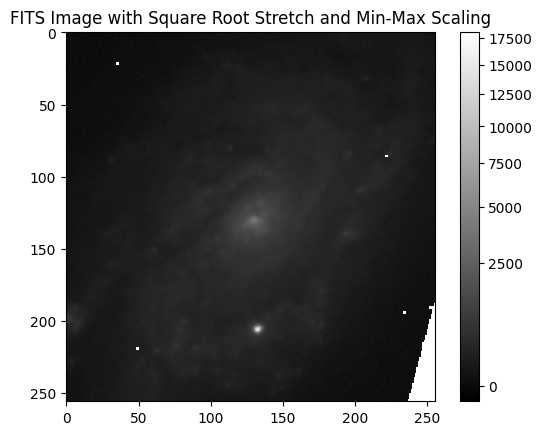

In [ ]:
from astropy.io import fits
import matplotlib.pyplot as plt
from astropy.visualization import (MinMaxInterval, SqrtStretch, ImageNormalize)

# Load the FITS file
fits_file = '/content/sample_data/wrapi3.fits'  # Replace with your actual FITS file path
hdulist = fits.open(fits_file)

# Display information about the FITS file
hdulist.info()

# Access the image data (in HDU 0, since there is only one HDU)
image_data = hdulist[0].data  # Access image data from the primary HDU

# Close the FITS file after loading
hdulist.close()

# Apply MinMax scaling and square-root stretch for better contrast
norm = ImageNormalize(image_data, interval=MinMaxInterval(), stretch=SqrtStretch())

# Display the FITS image using a normalization stretch
plt.imshow(image_data, cmap='gray', norm=norm)
plt.colorbar()
plt.title('FITS Image with Square Root Stretch and Min-Max Scaling')
plt.show()


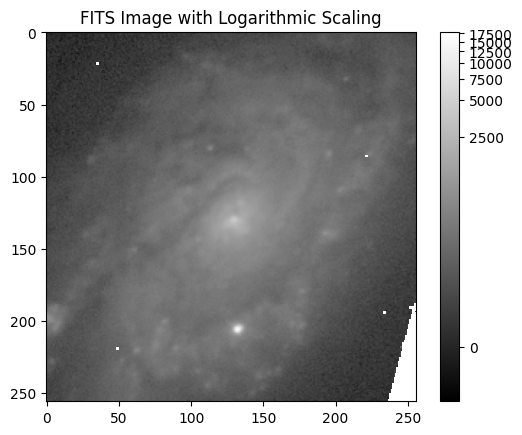

In [ ]:
from astropy.visualization import LogStretch
from astropy.visualization.mpl_normalize import ImageNormalize

# Normalize the image using a logarithmic scale
norm = ImageNormalize(stretch=LogStretch())

# Display the FITS image using a logarithmic scale
plt.imshow(image_data, cmap='gray', norm=norm)
plt.colorbar()
plt.title('FITS Image with Logarithmic Scaling')
plt.show()


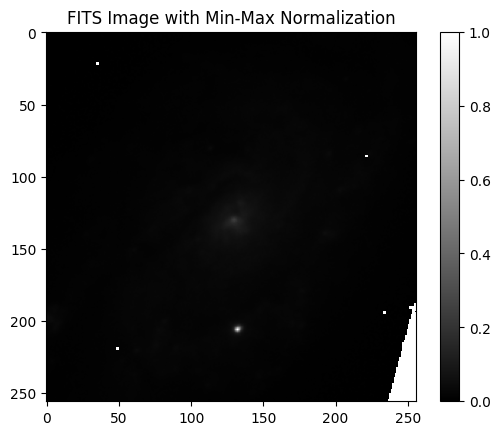

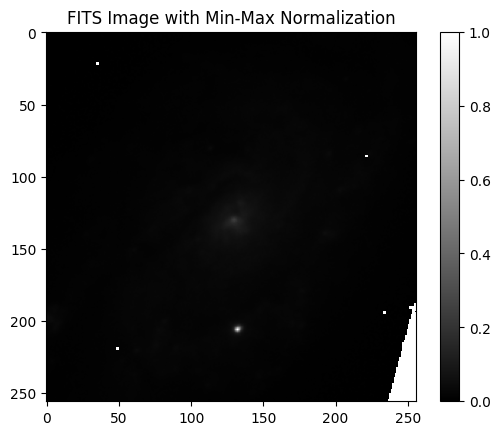

In [ ]:
from astropy.visualization import MinMaxInterval

# Normalize the image using min-max scaling
interval = MinMaxInterval()  # You can use a percentage interval too, like PercentileInterval(99.5)
image_rescaled = interval(image_data)

# Display the rescaled image
plt.imshow(image_rescaled, cmap='gray')
plt.colorbar()
plt.title('FITS Image with Min-Max Normalization')
plt.show()
from astropy.visualization import MinMaxInterval

# Normalize the image using min-max scaling
interval = MinMaxInterval()  # You can use a percentage interval too, like PercentileInterval(99.5)
image_rescaled = interval(image_data)

# Display the rescaled image
plt.imshow(image_rescaled, cmap='gray')
plt.colorbar()
plt.title('FITS Image with Min-Max Normalization')
plt.show()


Filename: /content/sample_data/wrapi3.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     132   (256, 256)   float32   
Filename: /content/sample_data/stacki3.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     277   (256, 256)   float32   
Noisy Image Stats:
 - Min: -32.32936
 - Max: 18100.055
 - NaNs: 621
Clean Image Stats:
 - Min: -53.80865
 - Max: 170527.77
 - NaNs: 0
Normalized Noisy Image - Min: -0.0017861471 Max: 1.0
Normalized Clean Image - Min: -0.00031554187 Max: 1.0


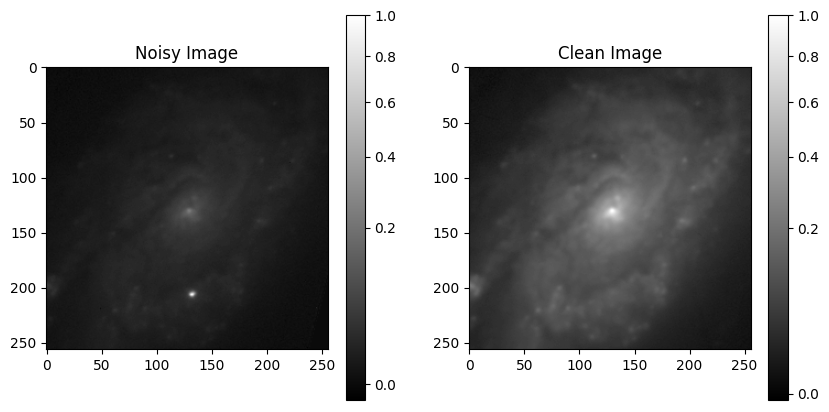

In [ ]:
from astropy.io import fits
import matplotlib.pyplot as plt
from astropy.visualization import (MinMaxInterval, SqrtStretch, ImageNormalize)
import numpy as np

# Function to load FITS file and handle NaN values
def load_fits_image(fits_file):
    hdulist = fits.open(fits_file)
    hdulist.info()

    # Access the image data (in HDU 0)
    image_data = hdulist[0].data  # Access image data from the primary HDU

    # Close the FITS file after loading
    hdulist.close()

    return image_data

# Load the noisy and clean images
noisy_image_path = '/content/sample_data/wrapi3.fits'  # Replace with your noisy FITS file path
clean_image_path = '/content/sample_data/stacki3.fits'  # Replace with your clean FITS file path

# Load the images
noisy_image_data = load_fits_image(noisy_image_path)
clean_image_data = load_fits_image(clean_image_path)

# Debug: Check for NaN and zero values in both images
print("Noisy Image Stats:")
print(" - Min:", np.nanmin(noisy_image_data))
print(" - Max:", np.nanmax(noisy_image_data))
print(" - NaNs:", np.isnan(noisy_image_data).sum())

print("Clean Image Stats:")
print(" - Min:", np.nanmin(clean_image_data))
print(" - Max:", np.nanmax(clean_image_data))
print(" - NaNs:", np.isnan(clean_image_data).sum())

# Replace NaN values and zero values if necessary (replace NaNs with zeros)
noisy_image_data = np.nan_to_num(noisy_image_data, nan=0.0)
clean_image_data = np.nan_to_num(clean_image_data, nan=0.0)

# Normalize both images to the range [0, 1] safely (avoid division by zero)
noisy_image_data = noisy_image_data.astype(np.float32) / (np.max(noisy_image_data) + 1e-8)
clean_image_data = clean_image_data.astype(np.float32) / (np.max(clean_image_data) + 1e-8)

# Debug: Ensure the normalized values are valid
print("Normalized Noisy Image - Min:", np.min(noisy_image_data), "Max:", np.max(noisy_image_data))
print("Normalized Clean Image - Min:", np.min(clean_image_data), "Max:", np.max(clean_image_data))

# Display the images
plt.figure(figsize=(10, 5))

# Normalize the image for better contrast display
norm_noisy = ImageNormalize(noisy_image_data, interval=MinMaxInterval(), stretch=SqrtStretch())
norm_clean = ImageNormalize(clean_image_data, interval=MinMaxInterval(), stretch=SqrtStretch())

# Display Noisy Image
plt.subplot(1, 2, 1)
plt.imshow(noisy_image_data, cmap='gray', norm=norm_noisy)
plt.colorbar()
plt.title('Noisy Image')

# Display Clean Image
plt.subplot(1, 2, 2)
plt.imshow(clean_image_data, cmap='gray', norm=norm_clean)
plt.colorbar()
plt.title('Clean Image')

plt.show()


Filename: /content/sample_data/wrapi3.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     132   (256, 256)   float32   
Filename: /content/sample_data/stacki3.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     277   (256, 256)   float32   


Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)           │ (None, 256, 256, 1)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_29 (Conv2D)                   │ (None, 256, 256, 64)        │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 128, 128, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_30 (Conv2D)                   │ (None, 128, 128, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 64, 64, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_31 (Conv2D)                   │ (None, 64, 64, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 32, 32, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_32 (Conv2D)                   │ (None, 32, 32, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_12 (UpSampling2D)      │ (None, 64, 64, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_33 (Conv2D)                   │ (None, 64, 64, 128)         │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_13 (UpSampling2D)      │ (None, 128, 128, 128)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_34 (Conv2D)                   │ (None, 128, 128, 64)        │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_14 (UpSampling2D)      │ (None, 256, 256, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_35 (Conv2D)                   │ (None, 256, 256, 1)         │             577 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,329,153 (5.07 MB)

 Trainable params: 1,329,153 (5.07 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 0.0682
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0337
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.1901
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0307
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0481
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0561
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0561
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.0535
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 0.0495
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0446
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0400
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0386
Epoch 13/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0423
Epoch 14/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0422
Epoch 15/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0395
Epoch 16/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0378
E

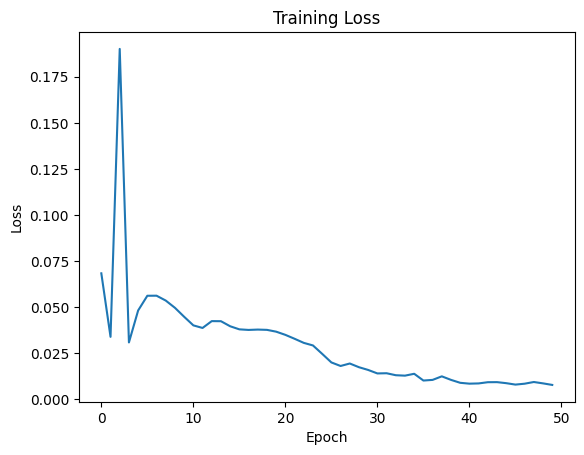

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step


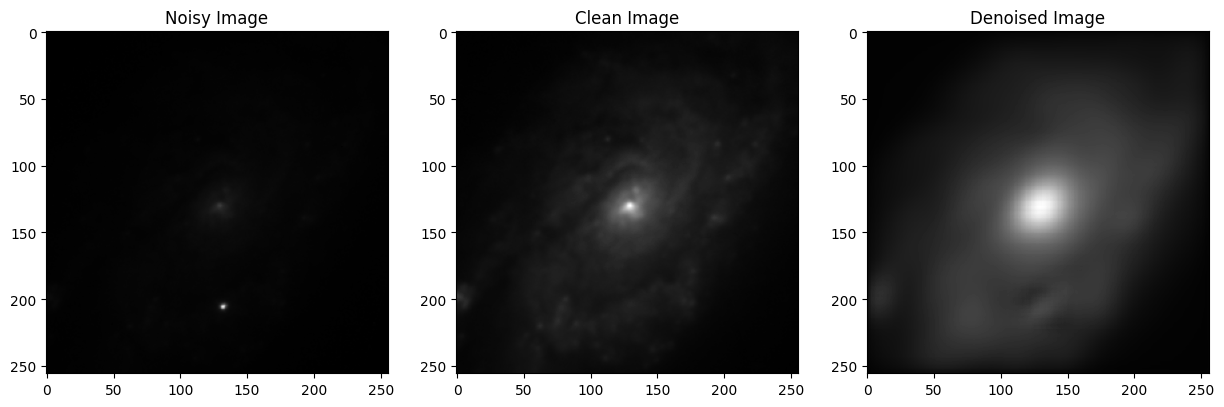

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.visualization import MinMaxInterval, SqrtStretch, ImageNormalize
import tensorflow as tf
from tensorflow.keras import layers, models
from skimage.transform import resize

# Function to load FITS file and handle NaN values
def load_fits_image(fits_file):
    hdulist = fits.open(fits_file)
    hdulist.info()

    # Access the image data (in HDU 0)
    image_data = hdulist[0].data  # Access image data from the primary HDU

    # Close the FITS file after loading
    hdulist.close()

    return image_data

# Load the noisy and clean images
noisy_image_path = '/content/sample_data/wrapi3.fits'  # Replace with your noisy FITS file path
clean_image_path = '/content/sample_data/stacki3.fits'  # Replace with your clean FITS file path

# Load both images
noisy_image_data = load_fits_image(noisy_image_path)
clean_image_data = load_fits_image(clean_image_path)

# Replace NaN values and zero values if necessary (replace NaNs with zeros)
noisy_image_data = np.nan_to_num(noisy_image_data, nan=0.0)
clean_image_data = np.nan_to_num(clean_image_data, nan=0.0)

# Normalize both images to the range [0, 1]
noisy_image_data = noisy_image_data.astype(np.float32) / (np.max(noisy_image_data) + 1e-8)
clean_image_data = clean_image_data.astype(np.float32) / (np.max(clean_image_data) + 1e-8)

# Add channel and batch dimensions for the autoencoder input (256x256 in this case)
noisy_image_data = np.expand_dims(np.expand_dims(noisy_image_data, axis=-1), axis=0)  # Shape: (1, 256, 256, 1)
clean_image_data = np.expand_dims(np.expand_dims(clean_image_data, axis=-1), axis=0)  # Shape: (1, 256, 256, 1)

# Add more layers to the autoencoder
def build_autoencoder(input_shape):
    input_img = layers.Input(shape=input_shape)

    # Encoder
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(input_img)
    x = layers.MaxPooling2D((2, 2), padding='same')(x)
    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D((2, 2), padding='same')(x)
    x = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(x)  # Increased filters
    x = layers.MaxPooling2D((2, 2), padding='same')(x)

    # Decoder
    x = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(x)
    x = layers.UpSampling2D((2, 2))(x)
    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = layers.UpSampling2D((2, 2))(x)
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = layers.UpSampling2D((2, 2))(x)

    # Output layer with linear activation
    output = layers.Conv2D(1, (3, 3), activation='linear', padding='same')(x)

    autoencoder = models.Model(input_img, output)
    return autoencoder

# Define the input shape based on the image dimensions (256x256 with 1 channel for grayscale)
input_shape = (256, 256, 1)

# Build and compile the autoencoder model
autoencoder = build_autoencoder(input_shape)
# autoencoder.compile(optimizer='adam', loss='mean_squared_error')
autoencoder.compile(optimizer='adam', loss='mean_absolute_error')

autoencoder.summary()

# Train the autoencoder using the noisy image as input and the clean image as the target
history = autoencoder.fit(noisy_image_data, clean_image_data, epochs=50, verbose=1)

# Plot the training loss
plt.plot(history.history['loss'])
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

# Use the autoencoder to denoise the noisy image
denoised_image = autoencoder.predict(noisy_image_data)

# Reshape the output for visualization
denoised_image = np.reshape(denoised_image, (denoised_image.shape[1], denoised_image.shape[2]))

# Plot the original noisy image, clean image, and the denoised image
plt.figure(figsize=(15, 5))

# Noisy image
plt.subplot(1, 3, 1)
plt.title('Noisy Image')
plt.imshow(noisy_image_data.squeeze(), cmap='gray')

# Clean image
plt.subplot(1, 3, 2)
plt.title('Clean Image')
plt.imshow(clean_image_data.squeeze(), cmap='gray')

# Denoised image
plt.subplot(1, 3, 3)
plt.title('Denoised Image')
plt.imshow(denoised_image, cmap='gray')

plt.show()


Filename: /content/sample_data/wrapi3.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     132   (256, 256)   float32   
Filename: /content/sample_data/stacki3.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     277   (256, 256)   float32   


Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)           │ (None, 256, 256, 1)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_36 (Conv2D)                   │ (None, 256, 256, 64)        │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 128, 128, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_37 (Conv2D)                   │ (None, 128, 128, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 64, 64, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_38 (Conv2D)                   │ (None, 64, 64, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 32, 32, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_39 (Conv2D)                   │ (None, 32, 32, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_18 (MaxPooling2D)      │ (None, 16, 16, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_40 (Conv2D)                   │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_15 (UpSampling2D)      │ (None, 32, 32, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_41 (Conv2D)                   │ (None, 32, 32, 256)         │       1,179,904 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_16 (UpSampling2D)      │ (None, 64, 64, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_42 (Conv2D)                   │ (None, 64, 64, 128)         │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_17 (UpSampling2D)      │ (None, 128, 128, 128)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_43 (Conv2D)                   │ (None, 128, 128, 64)        │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_18 (UpSampling2D)      │ (None, 256, 256, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_44 (Conv2D)                   │ (None, 256, 256, 1)         │             577 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,458,945 (20.82 MB)

 Trainable params: 5,458,945 (20.82 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step - loss: 0.0085
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0022
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.3916
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0030
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0072
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.0070
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 0.0063
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.0051
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0036
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 0.0049
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0038
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0034
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.0036
Epoch 14/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 0.0038
Epoch 15/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0038
Epoch 16/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step 

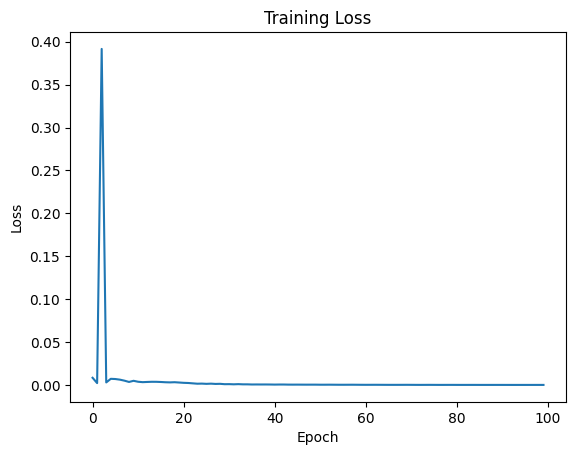

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 616ms/step
Denoised Image - Min: 0.0023095761 Max: 0.6933333


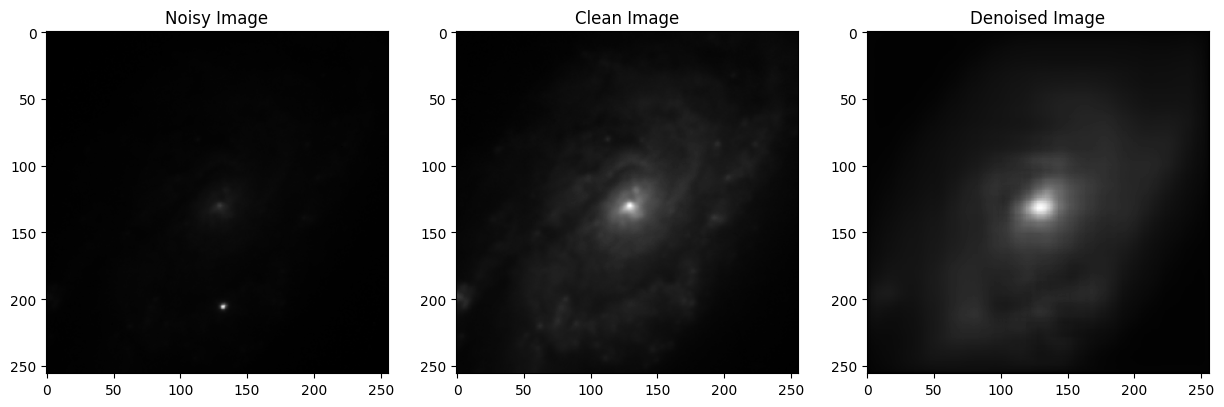

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.visualization import MinMaxInterval, SqrtStretch, ImageNormalize
import tensorflow as tf
from tensorflow.keras import layers, models

# Function to load FITS file and handle NaN values
def load_fits_image(fits_file):
    hdulist = fits.open(fits_file)
    hdulist.info()

    # Access the image data (in HDU 0)
    image_data = hdulist[0].data  # Access image data from the primary HDU

    # Close the FITS file after loading
    hdulist.close()

    return image_data

# Load the noisy and clean images
noisy_image_path = '/content/sample_data/wrapi3.fits'  # Replace with your noisy FITS file path
clean_image_path = '/content/sample_data/stacki3.fits'  # Replace with your clean FITS file path

# Load both images
noisy_image_data = load_fits_image(noisy_image_path)
clean_image_data = load_fits_image(clean_image_path)

# Replace NaN values and zero values if necessary (replace NaNs with zeros)
noisy_image_data = np.nan_to_num(noisy_image_data, nan=0.0)
clean_image_data = np.nan_to_num(clean_image_data, nan=0.0)

# Normalize both images to the range [0, 1]
noisy_image_data = noisy_image_data.astype(np.float32) / (np.max(noisy_image_data) + 1e-8)
clean_image_data = clean_image_data.astype(np.float32) / (np.max(clean_image_data) + 1e-8)

# Add channel and batch dimensions for the autoencoder input (256x256 in this case)
noisy_image_data = np.expand_dims(np.expand_dims(noisy_image_data, axis=-1), axis=0)  # Shape: (1, 256, 256, 1)
clean_image_data = np.expand_dims(np.expand_dims(clean_image_data, axis=-1), axis=0)  # Shape: (1, 256, 256, 1)

# Build a more complex autoencoder
def build_autoencoder(input_shape):
    input_img = layers.Input(shape=input_shape)

    # Encoder
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(input_img)
    x = layers.MaxPooling2D((2, 2), padding='same')(x)
    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D((2, 2), padding='same')(x)
    x = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D((2, 2), padding='same')(x)
    x = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(x)  # Added extra layer with more filters
    x = layers.MaxPooling2D((2, 2), padding='same')(x)

    # Decoder
    x = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(x)
    x = layers.UpSampling2D((2, 2))(x)
    x = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(x)
    x = layers.UpSampling2D((2, 2))(x)
    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = layers.UpSampling2D((2, 2))(x)
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = layers.UpSampling2D((2, 2))(x)

    # Output layer with linear activation
    output = layers.Conv2D(1, (3, 3), activation='linear', padding='same')(x)

    autoencoder = models.Model(input_img, output)
    return autoencoder

# Define the input shape based on the image dimensions (256x256 with 1 channel for grayscale)
input_shape = (256, 256, 1)

# Build and compile the autoencoder model
autoencoder = build_autoencoder(input_shape)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

autoencoder.summary()

# Train the autoencoder using the noisy image as input and the clean image as the target
history = autoencoder.fit(noisy_image_data, clean_image_data, epochs=100, verbose=1)  # Increased to 100 epochs

# Plot the training loss
plt.plot(history.history['loss'])
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

# Use the autoencoder to denoise the noisy image
denoised_image = autoencoder.predict(noisy_image_data)

# Check the range of the denoised image
print("Denoised Image - Min:", np.min(denoised_image), "Max:", np.max(denoised_image))

# Reshape the output for visualization
denoised_image = np.reshape(denoised_image, (denoised_image.shape[1], denoised_image.shape[2]))

# Plot the original noisy image, clean image, and the denoised image
plt.figure(figsize=(15, 5))

# Noisy image
plt.subplot(1, 3, 1)
plt.title('Noisy Image')
plt.imshow(noisy_image_data.squeeze(), cmap='gray')

# Clean image
plt.subplot(1, 3, 2)
plt.title('Clean Image')
plt.imshow(clean_image_data.squeeze(), cmap='gray')

# Denoised image
plt.subplot(1, 3, 3)
plt.title('Denoised Image')
plt.imshow(denoised_image, cmap='gray')

plt.show()


Filename: /content/sample_data/wrapi3.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     132   (256, 256)   float32   
Filename: /content/sample_data/stacki3.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     277   (256, 256)   float32   


Model: "functional_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_12            │ (None, 256, 256, 1)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_69 (Conv2D)        │ (None, 256, 256, 64)   │            640 │ input_layer_12[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_28          │ (None, 128, 128, 64)   │              0 │ conv2d_69[0][0]        │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_70 (Conv2D)        │ (None, 128, 128, 128)  │         73,856 │ max_pooling2d_28[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_29          │ (None, 64, 64, 128)    │              0 │ conv2d_70[0][0]        │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_71 (Conv2D)        │ (None, 64, 64, 256)    │        295,168 │ max_pooling2d_29[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_30          │ (None, 32, 32, 256)    │              0 │ conv2d_71[0][0]        │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_72 (Conv2D)        │ (None, 32, 32, 512)    │      1,180,160 │ max_pooling2d_30[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ up_sampling2d_28          │ (None, 64, 64, 512)    │              0 │ conv2d_72[0][0]        │
│ (UpSampling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_73 (Conv2D)        │ (None, 64, 64, 256)    │      1,179,904 │ up_sampling2d_28[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_9             │ (None, 64, 64, 512)    │              0 │ conv2d_73[0][0],       │
│ (Concatenate)             │                        │                │ conv2d_71[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ up_sampling2d_29          │ (None, 128, 128, 512)  │              0 │ concatenate_9[0][0]    │
│ (UpSampling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_74 (Conv2D)        │ (None, 128, 128, 128)  │        589,952 │ up_sampling2d_29[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_10            │ (None, 128, 128, 256)  │              0 │ conv2d_74[0][0],       │
│ (Concatenate)             │                        │                │ conv2d_70[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ up_sampling2d_30          │ (None, 256, 256, 256)  │              0 │ concatenate_10[0][0]   │
│ (UpSampling2D)            │                        │                │                        │
├──────────────────────

 Total params: 3,468,353 (13.23 MB)

 Trainable params: 3,468,353 (13.23 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step - loss: 0.0081
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step - loss: 0.0054
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step - loss: 0.0019
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step - loss: 0.0055
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step - loss: 0.0021
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step - loss: 0.0033
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step - loss: 0.0036
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step - loss: 0.0035
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step - loss: 0.0031
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - loss: 0.0026
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 0.0020
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step - loss: 0.0016
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step - loss: 0.0018
Epoch 14/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step - loss: 0.0017
Epoch 15/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - loss: 0.0013
Epoch 16/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s

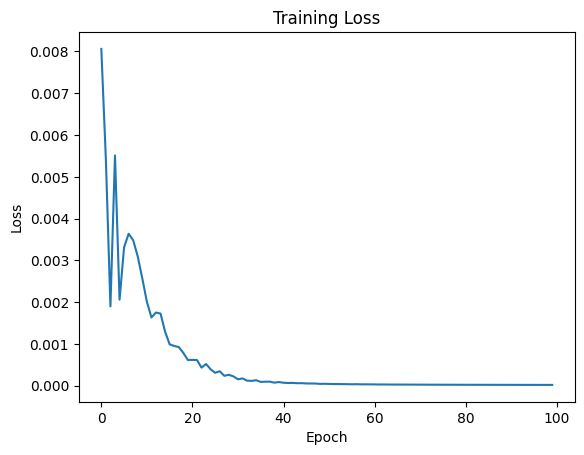

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Denoised Image - Min: 0.0041197976 Max: 0.83463657


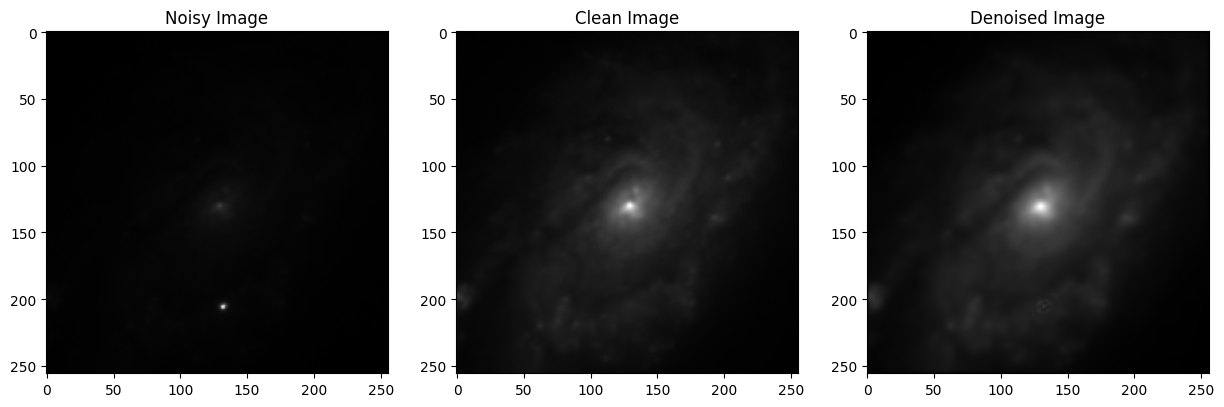

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.visualization import MinMaxInterval, SqrtStretch, ImageNormalize
import tensorflow as tf
from tensorflow.keras import layers, models

# Function to load FITS file and handle NaN values
def load_fits_image(fits_file):
    hdulist = fits.open(fits_file)
    hdulist.info()

    # Access the image data (in HDU 0)
    image_data = hdulist[0].data  # Access image data from the primary HDU

    # Close the FITS file after loading
    hdulist.close()

    return image_data

# Load the noisy and clean images
noisy_image_path = '/content/sample_data/wrapi3.fits'  # Replace with your noisy FITS file path
clean_image_path = '/content/sample_data/stacki3.fits'  # Replace with your clean FITS file path

# Load both images
noisy_image_data = load_fits_image(noisy_image_path)
clean_image_data = load_fits_image(clean_image_path)

# Replace NaN values and zero values if necessary (replace NaNs with zeros)
noisy_image_data = np.nan_to_num(noisy_image_data, nan=0.0)
clean_image_data = np.nan_to_num(clean_image_data, nan=0.0)

# Normalize both images to the range [0, 1]
noisy_image_data = noisy_image_data.astype(np.float32) / (np.max(noisy_image_data) + 1e-8)
clean_image_data = clean_image_data.astype(np.float32) / (np.max(clean_image_data) + 1e-8)

# Add channel and batch dimensions for the autoencoder input (256x256 in this case)
noisy_image_data = np.expand_dims(np.expand_dims(noisy_image_data, axis=-1), axis=0)  # Shape: (1, 256, 256, 1)
clean_image_data = np.expand_dims(np.expand_dims(clean_image_data, axis=-1), axis=0)  # Shape: (1, 256, 256, 1)

# Build a U-Net autoencoder
def build_unet_autoencoder(input_shape):
    inputs = layers.Input(shape=input_shape)

    # Encoder
    c1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    p1 = layers.MaxPooling2D((2, 2), padding='same')(c1)
    c2 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(p1)
    p2 = layers.MaxPooling2D((2, 2), padding='same')(c2)
    c3 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(p2)
    p3 = layers.MaxPooling2D((2, 2), padding='same')(c3)
    c4 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(p3)

    # Decoder with skip connections
    u3 = layers.UpSampling2D((2, 2))(c4)
    c5 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(u3)
    u2 = layers.concatenate([c5, c3])  # Skip connection
    u2 = layers.UpSampling2D((2, 2))(u2)
    c6 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(u2)
    u1 = layers.concatenate([c6, c2])  # Skip connection
    u1 = layers.UpSampling2D((2, 2))(u1)
    c7 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(u1)
    u0 = layers.concatenate([c7, c1])  # Skip connection

    # Output layer
    outputs = layers.Conv2D(1, (3, 3), activation='linear', padding='same')(u0)

    model = models.Model(inputs, outputs)
    return model

# Define the input shape based on the image dimensions (256x256 with 1 channel for grayscale)
input_shape = (256, 256, 1)

# Build and compile the U-Net autoencoder model
autoencoder = build_unet_autoencoder(input_shape)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

autoencoder.summary()

# Train the autoencoder using the noisy image as input and the clean image as the target
history = autoencoder.fit(noisy_image_data, clean_image_data, epochs=100, verbose=1)

# Plot the training loss
plt.plot(history.history['loss'])
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

# Use the autoencoder to denoise the noisy image
denoised_image = autoencoder.predict(noisy_image_data)

# Check the range of the denoised image
print("Denoised Image - Min:", np.min(denoised_image), "Max:", np.max(denoised_image))

# Reshape the output for visualization
denoised_image = np.reshape(denoised_image, (denoised_image.shape[1], denoised_image.shape[2]))

# Plot the original noisy image, clean image, and the denoised image
plt.figure(figsize=(15, 5))

# Noisy image
plt.subplot(1, 3, 1)
plt.title('Noisy Image')
plt.imshow(noisy_image_data.squeeze(), cmap='gray')

# Clean image
plt.subplot(1, 3, 2)
plt.title('Clean Image')
plt.imshow(clean_image_data.squeeze(), cmap='gray')

# Denoised image
plt.subplot(1, 3, 3)
plt.title('Denoised Image')
plt.imshow(denoised_image, cmap='gray')

plt.show()


Filename: /content/sample_data/wrapi3.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     132   (256, 256)   float32   
Filename: /content/sample_data/stacki3.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     277   (256, 256)   float32   
80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_9             │ (None, 256, 256, 1)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_53 (Conv2D)        │ (None, 256, 256, 64)   │            640 │ input_layer_9[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 256, 256, 64)   │            256 │ conv2d_53[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_22          │ (None, 128, 128, 64)   │              0 │ batch_normalization[0… │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_54 (Conv2D)        │ (None, 128, 128, 128)  │         73,856 │ max_pooling2d_22[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 128, 128, 128)  │            512 │ conv2d_54[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_23          │ (None, 64, 64, 128)    │              0 │ batch_normalization_1… │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_55 (Conv2D)        │ (None, 64, 64, 256)    │        295,168 │ max_pooling2d_23[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_2     │ (None, 64, 64, 256)    │          1,024 │ conv2d_55[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_24          │ (None, 32, 32, 256)    │              0 │ batch_normalization_2… │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_56 (Conv2D)        │ (None, 32, 32, 512)    │      1,180,160 │ max_pooling2d_24[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_3     │ (None, 32, 32, 512)    │          2,048 │ conv2d_56[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ up_sampling2d_22          │ (None, 64, 64, 512)    │              0 │ batch_normalization_3… │
│ (UpSampling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_57 (Conv2D)        │ (None, 64, 64, 256)    │      1,179,904 │ up_sampling2d_22[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_4     │ (None, 64, 64, 256)    │          1,024 │ conv2d_57[0][0]        │
│ (BatchNormalization) 

 Total params: 3,473,985 (13.25 MB)

 Trainable params: 3,471,169 (13.24 MB)

 Non-trainable params: 2,816 (11.00 KB)

Epoch 1/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 17s 17s/step - loss: 0.4036
Epoch 2/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step - loss: 0.1612
Epoch 3/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step - loss: 0.1166
Epoch 4/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step - loss: 0.0966
Epoch 5/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step - loss: 0.0827
Epoch 6/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step - loss: 0.0749
Epoch 7/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 13s 13s/step - loss: 0.0674
Epoch 8/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 19s 19s/step - loss: 0.0604
Epoch 9/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step - loss: 0.0559
Epoch 10/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step - loss: 0.0517
Epoch 11/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step - loss: 0.0483
Epoch 12/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step - loss: 0.0455
Epoch 13/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step - loss: 0.0430
Epoch 14/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step - loss: 0.0407
Epoch 15/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step - loss: 0.0386
Epoch 16/200
1/1 ━━━━━━━━━━━━

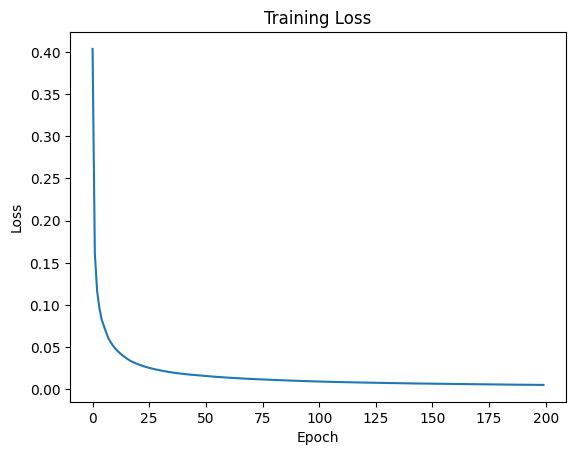

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Denoised Image - Min: -0.036806643 Max: 0.73886853
PSNR: 16.41532844800567


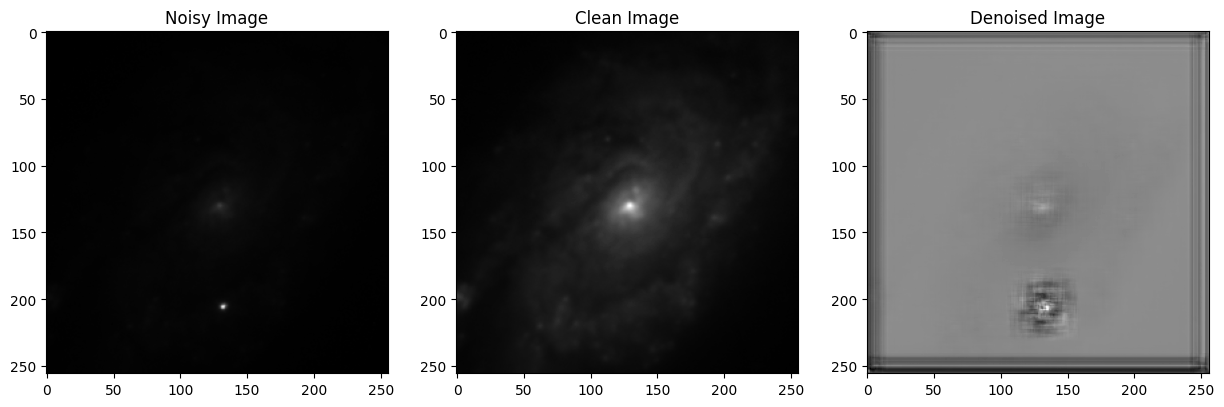

In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt
# from astropy.io import fits
# from astropy.visualization import MinMaxInterval, SqrtStretch, ImageNormalize
# import tensorflow as tf
# from tensorflow.keras import layers, models
# from skimage.metrics import peak_signal_noise_ratio as psnr
# from tensorflow.keras.applications import VGG19

# # Function to load FITS file and handle NaN values
# def load_fits_image(fits_file):
#     hdulist = fits.open(fits_file)
#     hdulist.info()

#     # Access the image data (in HDU 0)
#     image_data = hdulist[0].data  # Access image data from the primary HDU

#     # Close the FITS file after loading
#     hdulist.close()

#     return image_data

# # Load the noisy and clean images
# noisy_image_path = '/content/sample_data/wrapi3.fits'  # Replace with your noisy FITS file path
# clean_image_path = '/content/sample_data/stacki3.fits'  # Replace with your clean FITS file path

# # Load both images
# noisy_image_data = load_fits_image(noisy_image_path)
# clean_image_data = load_fits_image(clean_image_path)

# # Replace NaN values and zero values if necessary (replace NaNs with zeros)
# noisy_image_data = np.nan_to_num(noisy_image_data, nan=0.0)
# clean_image_data = np.nan_to_num(clean_image_data, nan=0.0)

# # Normalize both images to the range [0, 1]
# noisy_image_data = noisy_image_data.astype(np.float32) / (np.max(noisy_image_data) + 1e-8)
# clean_image_data = clean_image_data.astype(np.float32) / (np.max(clean_image_data) + 1e-8)

# # Add channel and batch dimensions for the autoencoder input (256x256 in this case)
# noisy_image_data = np.expand_dims(np.expand_dims(noisy_image_data, axis=-1), axis=0)  # Shape: (1, 256, 256, 1)
# clean_image_data = np.expand_dims(np.expand_dims(clean_image_data, axis=-1), axis=0)  # Shape: (1, 256, 256, 1)

# # Load pre-trained VGG model for perceptual loss (without the top classification layer)
# vgg = VGG19(weights="imagenet", include_top=False, input_shape=(256, 256, 3))
# vgg.trainable = False

# # Define perceptual loss based on the VGG network
# def perceptual_loss(y_true, y_pred):
#     y_true_rgb = tf.image.grayscale_to_rgb(y_true)  # Convert grayscale to RGB to match VGG input
#     y_pred_rgb = tf.image.grayscale_to_rgb(y_pred)
#     return tf.reduce_mean(tf.square(vgg(y_true_rgb) - vgg(y_pred_rgb)))

# # Build a U-Net autoencoder with Batch Normalization
# def build_unet_autoencoder(input_shape):
#     inputs = layers.Input(shape=input_shape)

#     # Encoder
#     c1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
#     c1 = layers.BatchNormalization()(c1)
#     p1 = layers.MaxPooling2D((2, 2), padding='same')(c1)

#     c2 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(p1)
#     c2 = layers.BatchNormalization()(c2)
#     p2 = layers.MaxPooling2D((2, 2), padding='same')(c2)

#     c3 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(p2)
#     c3 = layers.BatchNormalization()(c3)
#     p3 = layers.MaxPooling2D((2, 2), padding='same')(c3)

#     c4 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(p3)
#     c4 = layers.BatchNormalization()(c4)

#     # Decoder with skip connections
#     u3 = layers.UpSampling2D((2, 2))(c4)
#     c5 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(u3)
#     c5 = layers.BatchNormalization()(c5)
#     u2 = layers.concatenate([c5, c3])  # Skip connection
#     u2 = layers.UpSampling2D((2, 2))(u2)

#     c6 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(u2)
#     c6 = layers.BatchNormalization()(c6)
#     u1 = layers.concatenate([c6, c2])  # Skip connection
#     u1 = layers.UpSampling2D((2, 2))(u1)

#     c7 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(u1)
#     c7 = layers.BatchNormalization()(c7)
#     u0 = layers.concatenate([c7, c1])  # Skip connection

#     # Output layer
#     outputs = layers.Conv2D(1, (3, 3), activation='linear', padding='same')(u0)

#     model = models.Model(inputs, outputs)
#     return model

# # Define the input shape based on the image dimensions (256x256 with 1 channel for grayscale)
# input_shape = (256, 256, 1)

# # Build and compile the U-Net autoencoder model
# autoencoder = build_unet_autoencoder(input_shape)
# autoencoder.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4), loss=perceptual_loss)

# autoencoder.summary()

# # Train the autoencoder using the noisy image as input and the clean image as the target
# history = autoencoder.fit(noisy_image_data, clean_image_data, epochs=200, verbose=1)

# # Plot the training loss
# plt.plot(history.history['loss'])
# plt.title('Training Loss')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.show()

# # Use the autoencoder to denoise the noisy image
# denoised_image = autoencoder.predict(noisy_image_data)

# # Check the range of the denoised image
# print("Denoised Image - Min:", np.min(denoised_image), "Max:", np.max(denoised_image))

# # Reshape the output for visualization
# denoised_image = np.reshape(denoised_image, (denoised_image.shape[1], denoised_image.shape[2]))

# # Calculate PSNR between the clean and denoised images
# psnr_value = psnr(clean_image_data.squeeze(), denoised_image)
# print("PSNR:", psnr_value)

# # Plot the original noisy image, clean image, and the denoised image
# plt.figure(figsize=(15, 5))

# # Noisy image
# plt.subplot(1, 3, 1)
# plt.title('Noisy Image')
# plt.imshow(noisy_image_data.squeeze(), cmap='gray')

# # Clean image
# plt.subplot(1, 3, 2)
# plt.title('Clean Image')
# plt.imshow(clean_image_data.squeeze(), cmap='gray')

# # Denoised image
# plt.subplot(1, 3, 3)
# plt.title('Denoised Image')
# plt.imshow(denoised_image, cmap='gray')

# plt.show()


Filename: /content/sample_data/wrapi3.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     132   (256, 256)   float32   
Filename: /content/sample_data/stacki3.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     277   (256, 256)   float32   


Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_11            │ (None, 256, 256, 1)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_61 (Conv2D)        │ (None, 256, 256, 64)   │            640 │ input_layer_11[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_7     │ (None, 256, 256, 64)   │            256 │ conv2d_61[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_25          │ (None, 128, 128, 64)   │              0 │ batch_normalization_7… │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_62 (Conv2D)        │ (None, 128, 128, 128)  │         73,856 │ max_pooling2d_25[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_8     │ (None, 128, 128, 128)  │            512 │ conv2d_62[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_26          │ (None, 64, 64, 128)    │              0 │ batch_normalization_8… │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_63 (Conv2D)        │ (None, 64, 64, 256)    │        295,168 │ max_pooling2d_26[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_9     │ (None, 64, 64, 256)    │          1,024 │ conv2d_63[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_27          │ (None, 32, 32, 256)    │              0 │ batch_normalization_9… │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_64 (Conv2D)        │ (None, 32, 32, 512)    │      1,180,160 │ max_pooling2d_27[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_10    │ (None, 32, 32, 512)    │          2,048 │ conv2d_64[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ up_sampling2d_25          │ (None, 64, 64, 512)    │              0 │ batch_normalization_1… │
│ (UpSampling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_65 (Conv2D)        │ (None, 64, 64, 256)    │      1,179,904 │ up_sampling2d_25[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_11    │ (None, 64, 64, 256)    │          1,024 │ conv2d_65[0][0]        │
│ (BatchNormalization) 

 Total params: 3,473,985 (13.25 MB)

 Trainable params: 3,471,169 (13.24 MB)

 Non-trainable params: 2,816 (11.00 KB)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 19s 19s/step - loss: 0.1473
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step - loss: 0.1210
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step - loss: 0.0921
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step - loss: 0.0702
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step - loss: 0.0582
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step - loss: 0.0511
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 20s 20s/step - loss: 0.0461
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step - loss: 0.0424
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step - loss: 0.0398
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step - loss: 0.0372
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step - loss: 0.0352
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step - loss: 0.0334
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step - loss: 0.0318
Epoch 14/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step - loss: 0.0304
Epoch 15/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step - loss: 0.0294
Epoch 16/100
1/1 ━━━━━━━━━━

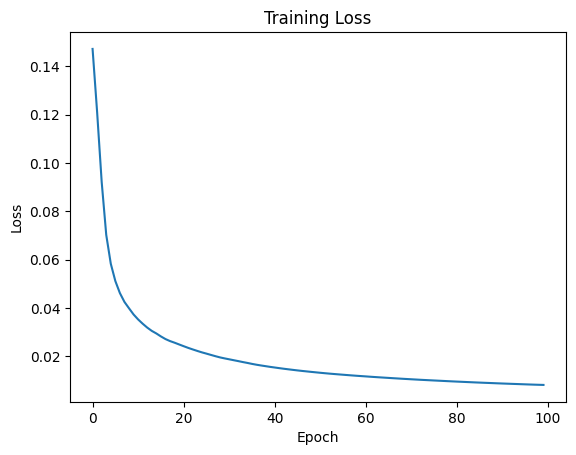

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Denoised Image - Min: -0.17648777 Max: 0.12351405
PSNR: 29.831035635906137


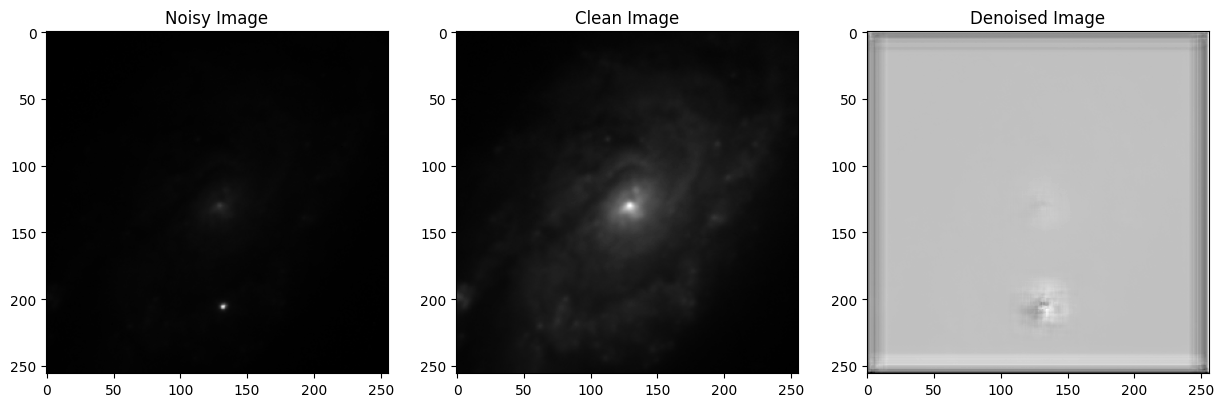

In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt
# from astropy.io import fits
# from astropy.visualization import MinMaxInterval, SqrtStretch, ImageNormalize
# import tensorflow as tf
# from tensorflow.keras import layers, models
# from skimage.metrics import peak_signal_noise_ratio as psnr
# from tensorflow.keras.applications import VGG19

# # Function to load FITS file and handle NaN values
# def load_fits_image(fits_file):
#     hdulist = fits.open(fits_file)
#     hdulist.info()

#     # Access the image data (in HDU 0)
#     image_data = hdulist[0].data  # Access image data from the primary HDU

#     # Close the FITS file after loading
#     hdulist.close()

#     return image_data

# # Load the noisy and clean images
# noisy_image_path = '/content/sample_data/wrapi3.fits'  # Replace with your noisy FITS file path
# clean_image_path = '/content/sample_data/stacki3.fits'  # Replace with your clean FITS file path

# # Load both images
# noisy_image_data = load_fits_image(noisy_image_path)
# clean_image_data = load_fits_image(clean_image_path)

# # Replace NaN values and zero values if necessary (replace NaNs with zeros)
# noisy_image_data = np.nan_to_num(noisy_image_data, nan=0.0)
# clean_image_data = np.nan_to_num(clean_image_data, nan=0.0)

# # Normalize both images to the range [0, 1]
# noisy_image_data = noisy_image_data.astype(np.float32) / (np.max(noisy_image_data) + 1e-8)
# clean_image_data = clean_image_data.astype(np.float32) / (np.max(clean_image_data) + 1e-8)

# # Add channel and batch dimensions for the autoencoder input (256x256 in this case)
# noisy_image_data = np.expand_dims(np.expand_dims(noisy_image_data, axis=-1), axis=0)  # Shape: (1, 256, 256, 1)
# clean_image_data = np.expand_dims(np.expand_dims(clean_image_data, axis=-1), axis=0)  # Shape: (1, 256, 256, 1)

# # Load pre-trained VGG model for perceptual loss (without the top classification layer)
# vgg = VGG19(weights="imagenet", include_top=False, input_shape=(256, 256, 3))
# vgg.trainable = False

# # Define perceptual loss based on the VGG network
# def perceptual_loss(y_true, y_pred):
#     y_true_rgb = tf.image.grayscale_to_rgb(y_true)  # Convert grayscale to RGB to match VGG input
#     y_pred_rgb = tf.image.grayscale_to_rgb(y_pred)
#     return tf.reduce_mean(tf.square(vgg(y_true_rgb) - vgg(y_pred_rgb)))

# # Build a U-Net autoencoder with Batch Normalization
# def build_unet_autoencoder(input_shape):
#     inputs = layers.Input(shape=input_shape)

#     # Encoder
#     c1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
#     c1 = layers.BatchNormalization()(c1)
#     p1 = layers.MaxPooling2D((2, 2), padding='same')(c1)

#     c2 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(p1)
#     c2 = layers.BatchNormalization()(c2)
#     p2 = layers.MaxPooling2D((2, 2), padding='same')(c2)

#     c3 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(p2)
#     c3 = layers.BatchNormalization()(c3)
#     p3 = layers.MaxPooling2D((2, 2), padding='same')(c3)

#     c4 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(p3)
#     c4 = layers.BatchNormalization()(c4)

#     # Decoder with skip connections
#     u3 = layers.UpSampling2D((2, 2))(c4)
#     c5 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(u3)
#     c5 = layers.BatchNormalization()(c5)
#     u2 = layers.concatenate([c5, c3])  # Skip connection
#     u2 = layers.UpSampling2D((2, 2))(u2)

#     c6 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(u2)
#     c6 = layers.BatchNormalization()(c6)
#     u1 = layers.concatenate([c6, c2])  # Skip connection
#     u1 = layers.UpSampling2D((2, 2))(u1)

#     c7 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(u1)
#     c7 = layers.BatchNormalization()(c7)
#     u0 = layers.concatenate([c7, c1])  # Skip connection

#     # Output layer
#     outputs = layers.Conv2D(1, (3, 3), activation='linear', padding='same')(u0)

#     model = models.Model(inputs, outputs)
#     return model

# # Define the input shape based on the image dimensions (256x256 with 1 channel for grayscale)
# input_shape = (256, 256, 1)

# # Build and compile the U-Net autoencoder model
# autoencoder = build_unet_autoencoder(input_shape)
# autoencoder.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4), loss=perceptual_loss)

# autoencoder.summary()

# # Train the autoencoder using the noisy image as input and the clean image as the target
# history = autoencoder.fit(noisy_image_data, clean_image_data, epochs=100, verbose=1)

# # Plot the training loss
# plt.plot(history.history['loss'])
# plt.title('Training Loss')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.show()

# # Use the autoencoder to denoise the noisy image
# denoised_image = autoencoder.predict(noisy_image_data)

# # Check the range of the denoised image
# print("Denoised Image - Min:", np.min(denoised_image), "Max:", np.max(denoised_image))

# # Reshape the output for visualization
# denoised_image = np.reshape(denoised_image, (denoised_image.shape[1], denoised_image.shape[2]))

# # Calculate PSNR between the clean and denoised images
# psnr_value = psnr(clean_image_data.squeeze(), denoised_image)
# print("PSNR:", psnr_value)

# # Plot the original noisy image, clean image, and the denoised image
# plt.figure(figsize=(15, 5))

# # Noisy image
# plt.subplot(1, 3, 1)
# plt.title('Noisy Image')
# plt.imshow(noisy_image_data.squeeze(), cmap='gray')

# # Clean image
# plt.subplot(1, 3, 2)
# plt.title('Clean Image')
# plt.imshow(clean_image_data.squeeze(), cmap='gray')

# # Denoised image
# plt.subplot(1, 3, 3)
# plt.title('Denoised Image')
# plt.imshow(denoised_image, cmap='gray')

# plt.show()


Filename: /content/sample_data/wrapi3.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     132   (256, 256)   float32   
Filename: /content/sample_data/stacki3.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     277   (256, 256)   float32   


Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_20 (InputLayer)          │ (None, 256, 256, 1)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_119 (Conv2D)                  │ (None, 256, 256, 64)        │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_45 (MaxPooling2D)      │ (None, 128, 128, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_120 (Conv2D)                  │ (None, 128, 128, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_46 (MaxPooling2D)      │ (None, 64, 64, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_121 (Conv2D)                  │ (None, 64, 64, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ self_attention_1 (SelfAttention)     │ (None, 64, 64, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_47 (MaxPooling2D)      │ (None, 32, 32, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_125 (Conv2D)                  │ (None, 32, 32, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_31 (UpSampling2D)      │ (None, 64, 64, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_126 (Conv2D)                  │ (None, 64, 64, 128)         │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_32 (UpSampling2D)      │ (None, 128, 128, 128)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_127 (Conv2D)                  │ (None, 128, 128, 64)        │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_33 (UpSampling2D)      │ (None, 256, 256, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_128 (Conv2D)                  │ (None, 256, 256, 1)         │             577 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,329,153 (5.07 MB)

 Trainable params: 1,329,153 (5.07 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step - loss: 0.1893
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 0.1755
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 0.1054
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 0.0115
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 0.0089
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 0.0085
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 0.0085
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 0.0085
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.0085
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 0.0085
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 0.0085
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 0.0085
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 0.0085
Epoch 14/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.0085
Epoch 15/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 0.0085
Epoch 16/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step 

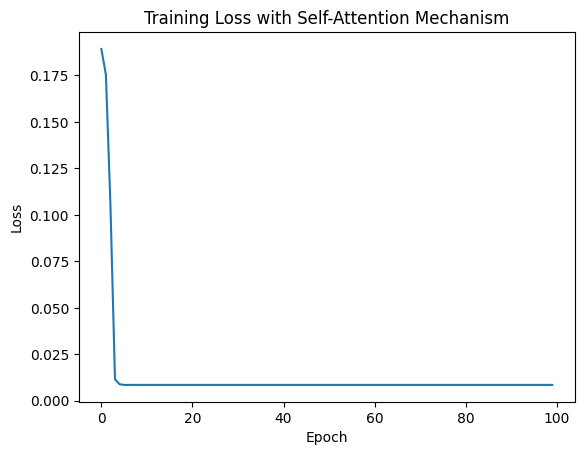

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


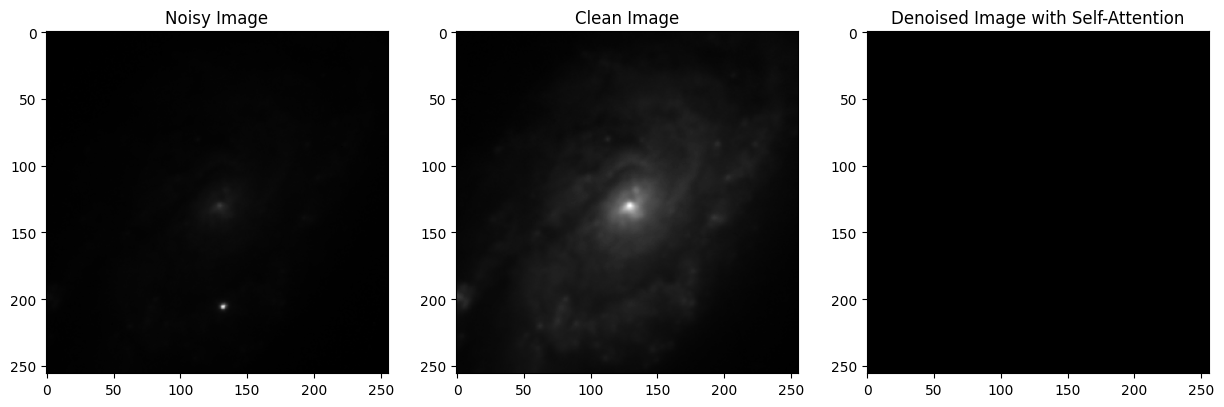

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.visualization import MinMaxInterval, SqrtStretch, ImageNormalize
import tensorflow as tf
from tensorflow.keras import layers, models

# Function to load FITS file and handle NaN values
def load_fits_image(fits_file):
    hdulist = fits.open(fits_file)
    hdulist.info()

    # Access the image data (in HDU 0)
    image_data = hdulist[0].data  # Access image data from the primary HDU
    hdulist.close()  # Close the FITS file after loading

    return image_data

# Load the noisy and clean images
noisy_image_path = '/content/sample_data/wrapi3.fits'  # Replace with your noisy FITS file path
clean_image_path = '/content/sample_data/stacki3.fits'  # Replace with your clean FITS file path

# Load both images
noisy_image_data = load_fits_image(noisy_image_path)
clean_image_data = load_fits_image(clean_image_path)

# Replace NaN values and normalize both images
noisy_image_data = np.nan_to_num(noisy_image_data, nan=0.0)
clean_image_data = np.nan_to_num(clean_image_data, nan=0.0)

# Normalize to range [0, 1]
noisy_image_data = noisy_image_data.astype(np.float32) / (np.max(noisy_image_data) + 1e-8)
clean_image_data = clean_image_data.astype(np.float32) / (np.max(clean_image_data) + 1e-8)

# Reshape the images for the autoencoder (Add channel and batch dimensions)
noisy_image_data = np.expand_dims(np.expand_dims(noisy_image_data, axis=-1), axis=0)
clean_image_data = np.expand_dims(np.expand_dims(clean_image_data, axis=-1), axis=0)

# Custom Attention Layer
class SelfAttention(layers.Layer):
    def __init__(self, filters):
        super(SelfAttention, self).__init__()
        self.filters = filters
        self.query_conv = layers.Conv2D(filters // 8, kernel_size=1)
        self.key_conv = layers.Conv2D(filters // 8, kernel_size=1)
        self.value_conv = layers.Conv2D(filters, kernel_size=1)
        self.softmax = layers.Softmax(axis=-1)

    def build(self, input_shape):
        _, height, width, channels = input_shape
        self.flatten_dim = height * width

    def call(self, inputs):
        query = self.query_conv(inputs)
        key = self.key_conv(inputs)
        value = self.value_conv(inputs)

        # Reshape the key and query for matrix multiplication
        batch_size = tf.shape(query)[0]
        query = tf.reshape(query, [batch_size, self.flatten_dim, -1])
        key = tf.reshape(key, [batch_size, self.flatten_dim, -1])
        value = tf.reshape(value, [batch_size, self.flatten_dim, self.filters])

        # Attention calculation
        attention_scores = tf.matmul(query, key, transpose_b=True)
        attention_weights = self.softmax(attention_scores)

        # Apply attention weights to the value tensor
        context = tf.matmul(attention_weights, value)
        context = tf.reshape(context, [batch_size, tf.shape(inputs)[1], tf.shape(inputs)[2], self.filters])

        return layers.Add()([context, inputs])

    def compute_output_shape(self, input_shape):
        return input_shape

# Build the Autoencoder with Attention Mechanism at the bottleneck
def build_autoencoder_with_attention(input_shape):
    input_img = layers.Input(shape=input_shape)

    # Encoder
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(input_img)
    x = layers.MaxPooling2D((2, 2), padding='same')(x)

    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D((2, 2), padding='same')(x)

    # Bottleneck with Self-Attention
    x = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(x)
    x = SelfAttention(filters=256)(x)  # Self-attention at the bottleneck
    x = layers.MaxPooling2D((2, 2), padding='same')(x)

    # Decoder
    x = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(x)
    x = layers.UpSampling2D((2, 2))(x)

    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = layers.UpSampling2D((2, 2))(x)

    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = layers.UpSampling2D((2, 2))(x)

    # Output layer
    output = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

    autoencoder = models.Model(input_img, output)
    return autoencoder

# Define the input shape based on the image dimensions
input_shape = (256, 256, 1)  # Grayscale galaxy images

# Build and compile the autoencoder model
autoencoder = build_autoencoder_with_attention(input_shape)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

autoencoder.summary()

# Train the autoencoder
history = autoencoder.fit(noisy_image_data, clean_image_data, epochs=100, verbose=1)

# Plot the training loss
plt.plot(history.history['loss'])
plt.title('Training Loss with Self-Attention Mechanism')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

# Denoise the image
denoised_image = autoencoder.predict(noisy_image_data)

# Reshape the output for visualization
denoised_image = np.reshape(denoised_image, (denoised_image.shape[1], denoised_image.shape[2]))

# Plot the original noisy, clean, and denoised images
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title('Noisy Image')
plt.imshow(noisy_image_data.squeeze(), cmap='gray')

plt.subplot(1, 3, 2)
plt.title('Clean Image')
plt.imshow(clean_image_data.squeeze(), cmap='gray')

plt.subplot(1, 3, 3)
plt.title('Denoised Image with Self-Attention')
plt.imshow(denoised_image, cmap='gray')

plt.show()


Filename: /content/sample_data/wrapi3.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     132   (256, 256)   float32   
Filename: /content/sample_data/stacki3.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     277   (256, 256)   float32   


Model: "functional_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_23            │ (None, 256, 256, 1)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_142 (Conv2D)       │ (None, 256, 256, 64)   │            640 │ input_layer_23[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_54          │ (None, 128, 128, 64)   │              0 │ conv2d_142[0][0]       │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_143 (Conv2D)       │ (None, 128, 128, 128)  │         73,856 │ max_pooling2d_54[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_55          │ (None, 64, 64, 128)    │              0 │ conv2d_143[0][0]       │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_144 (Conv2D)       │ (None, 64, 64, 256)    │        295,168 │ max_pooling2d_55[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_56          │ (None, 32, 32, 256)    │              0 │ conv2d_144[0][0]       │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ self_attention_3          │ (None, 32, 32, 256)    │         82,241 │ max_pooling2d_56[0][0] │
│ (SelfAttention)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ up_sampling2d_37          │ (None, 64, 64, 256)    │              0 │ self_attention_3[0][0] │
│ (UpSampling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_148 (Conv2D)       │ (None, 64, 64, 256)    │        590,080 │ up_sampling2d_37[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_12            │ (None, 64, 64, 512)    │              0 │ conv2d_148[0][0],      │
│ (Concatenate)             │                        │                │ conv2d_144[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ up_sampling2d_38          │ (None, 128, 128, 512)  │              0 │ concatenate_12[0][0]   │
│ (UpSampling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_149 (Conv2D)       │ (None, 128, 128, 128)  │        589,952 │ up_sampling2d_38[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_13            │ (None, 128, 128, 256)  │              0 │ conv2d_149[0][0],      │
│ (Concatenate)             │                        │                │ conv2d_143[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ up_sampling2d_39          │ (None, 256, 256, 256)  │              0 │ concatenate_13[0][0]   │
│ (UpSampling2D)       

 Total params: 1,780,610 (6.79 MB)

 Trainable params: 1,780,610 (6.79 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step - loss: 0.0082
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step - loss: 0.0042
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step - loss: 0.0068
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step - loss: 0.0021
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 0.0033
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 0.0037
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - loss: 0.0034
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 0.0028
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - loss: 0.0020
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 0.0013
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step - loss: 0.0014
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step - loss: 0.0014
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step - loss: 7.5712e-04
Epoch 14/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step - loss: 6.8204e-04
Epoch 15/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step - loss: 8.6778e-04
Epoch 16/100
1/1 ━━━━━━━━━━━━━━

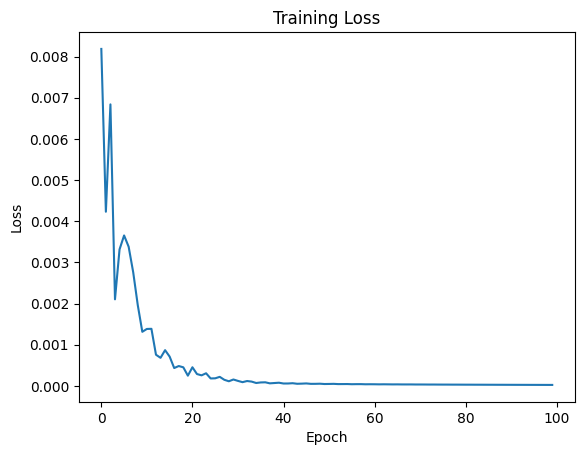

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Denoised Image - Min: 0.002575967 Max: 0.8010379


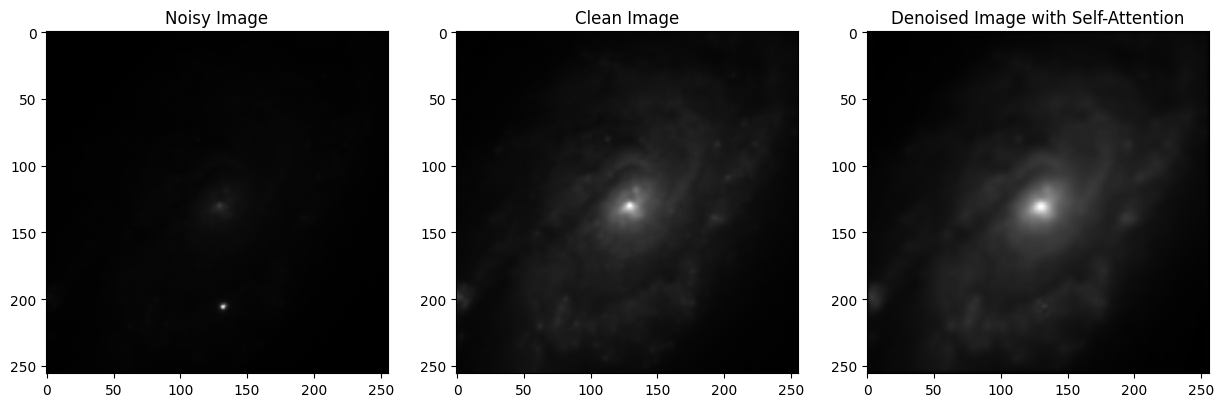

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.visualization import MinMaxInterval, SqrtStretch, ImageNormalize
import tensorflow as tf
from tensorflow.keras import layers, models

# Function to load FITS file and handle NaN values
def load_fits_image(fits_file):
    hdulist = fits.open(fits_file)
    hdulist.info()

    # Access the image data (in HDU 0)
    image_data = hdulist[0].data  # Access image data from the primary HDU

    # Close the FITS file after loading
    hdulist.close()

    return image_data

# Load the noisy and clean images
noisy_image_path = '/content/sample_data/wrapi3.fits'  # Replace with your noisy FITS file path
clean_image_path = '/content/sample_data/stacki3.fits'  # Replace with your clean FITS file path

# Load both images
noisy_image_data = load_fits_image(noisy_image_path)
clean_image_data = load_fits_image(clean_image_path)

# Replace NaN values and zero values if necessary (replace NaNs with zeros)
noisy_image_data = np.nan_to_num(noisy_image_data, nan=0.0)
clean_image_data = np.nan_to_num(clean_image_data, nan=0.0)

# Normalize both images to the range [0, 1]
noisy_image_data = noisy_image_data.astype(np.float32) / (np.max(noisy_image_data) + 1e-8)
clean_image_data = clean_image_data.astype(np.float32) / (np.max(clean_image_data) + 1e-8)

# Add channel and batch dimensions for the autoencoder input (256x256 in this case)
noisy_image_data = np.expand_dims(np.expand_dims(noisy_image_data, axis=-1), axis=0)  # Shape: (1, 256, 256, 1)
clean_image_data = np.expand_dims(np.expand_dims(clean_image_data, axis=-1), axis=0)  # Shape: (1, 256, 256, 1)

# Define the Self-Attention block
class SelfAttention(layers.Layer):
    def __init__(self, filters):
        super(SelfAttention, self).__init__()
        self.filters = filters
        self.query_conv = layers.Conv2D(filters // 8, kernel_size=1)
        self.key_conv = layers.Conv2D(filters // 8, kernel_size=1)
        self.value_conv = layers.Conv2D(filters, kernel_size=1)
        self.gamma = self.add_weight(shape=[1], initializer='zeros', trainable=True)

    def build(self, input_shape):
        # Store the input shape so that we can use it later in the call
        self.batch_size, self.height, self.width, self.channels = input_shape

    def call(self, inputs):
        # Create query, key, value projections
        query = self.query_conv(inputs)
        key = self.key_conv(inputs)
        value = self.value_conv(inputs)

        # Reshape for matrix multiplication
        query = tf.reshape(query, [-1, self.height * self.width, self.filters // 8])
        key = tf.reshape(key, [-1, self.height * self.width, self.filters // 8])
        value = tf.reshape(value, [-1, self.height * self.width, self.filters])

        # Attention map
        attention_scores = tf.matmul(query, key, transpose_b=True)
        attention_scores = tf.nn.softmax(attention_scores, axis=-1)

        # Weighted sum of value projections
        attention_output = tf.matmul(attention_scores, value)
        attention_output = tf.reshape(attention_output, [-1, self.height, self.width, self.filters])

        return self.gamma * attention_output + inputs

# Build a U-Net autoencoder with self-attention
def build_unet_autoencoder_with_attention(input_shape):
    inputs = layers.Input(shape=input_shape)

    # Encoder
    c1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    p1 = layers.MaxPooling2D((2, 2), padding='same')(c1)
    c2 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(p1)
    p2 = layers.MaxPooling2D((2, 2), padding='same')(c2)
    c3 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(p2)
    p3 = layers.MaxPooling2D((2, 2), padding='same')(c3)

    # Apply attention after encoder
    attention_block = SelfAttention(256)(p3)

    # Decoder with skip connections
    u3 = layers.UpSampling2D((2, 2))(attention_block)
    c5 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(u3)
    u2 = layers.concatenate([c5, c3])  # Skip connection
    u2 = layers.UpSampling2D((2, 2))(u2)
    c6 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(u2)
    u1 = layers.concatenate([c6, c2])  # Skip connection
    u1 = layers.UpSampling2D((2, 2))(u1)
    c7 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(u1)
    u0 = layers.concatenate([c7, c1])  # Skip connection

    # Output layer
    outputs = layers.Conv2D(1, (3, 3), activation='linear', padding='same')(u0)

    model = models.Model(inputs, outputs)
    return model

# Define the input shape based on the image dimensions (256x256 with 1 channel for grayscale)
input_shape = (256, 256, 1)

# Build and compile the U-Net autoencoder with attention model
autoencoder = build_unet_autoencoder_with_attention(input_shape)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

autoencoder.summary()

# Train the autoencoder using the noisy image as input and the clean image as the target
history = autoencoder.fit(noisy_image_data, clean_image_data, epochs=100, verbose=1)

# Plot the training loss
plt.plot(history.history['loss'])
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

# Use the autoencoder to denoise the noisy image
denoised_image = autoencoder.predict(noisy_image_data)

# Check the range of the denoised image
print("Denoised Image - Min:", np.min(denoised_image), "Max:", np.max(denoised_image))

# Reshape the output for visualization
denoised_image = np.reshape(denoised_image, (denoised_image.shape[1], denoised_image.shape[2]))

# Plot the original noisy image, clean image, and the denoised image
plt.figure(figsize=(15, 5))

# Noisy image
plt.subplot(1, 3, 1)
plt.title('Noisy Image')
plt.imshow(noisy_image_data.squeeze(), cmap='gray')

# Clean image
plt.subplot(1, 3, 2)
plt.title('Clean Image')
plt.imshow(clean_image_data.squeeze(), cmap='gray')

# Denoised image
plt.subplot(1, 3, 3)
plt.title('Denoised Image with Self-Attention')
plt.imshow(denoised_image, cmap='gray')

plt.show()


In [ ]:
pip install scikit-image


In [ ]:
from skimage.metrics import structural_similarity as ssim
import numpy as np

# Function to calculate SSIM between clean and denoised images
def calculate_ssim(clean_img, denoised_img):
    # Make sure images are squeezed to remove the extra dimensions if any
    clean_img = np.squeeze(clean_img)
    denoised_img = np.squeeze(denoised_img)

    # Calculate SSIM
    ssim_value = ssim(clean_img, denoised_img, data_range=denoised_img.max() - denoised_img.min())
    return ssim_value

# After denoising, calculate SSIM
ssim_value = calculate_ssim(clean_image_data, denoised_image)
print("SSIM between Clean and Denoised Image:", ssim_value)


SSIM between Clean and Denoised Image: 0.9882314510002136
